### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore') # Keeps the notebook clean

In [2]:
df = pd.read_csv("Dataset.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [4]:
### drop the column instant

df = df.drop(columns="instant")

In [5]:
# Convert to datetime object
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)

In [6]:
df.describe()

,dteday,hr,weekday,cnt
count,17379,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,11.546752,3.003683,189.463088
min,2011-01-01 00:00:00,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,6.000000,1.000000,40.000000
50%,2012-01-02 00:00:00,12.000000,3.000000,142.000000
75%,2012-07-02 00:00:00,18.000000,5.000000,281.000000
max,2012-12-31 00:00:00,23.000000,6.000000,977.000000
std,NaN,6.914405,2.005771,181.387599


In [7]:
summary = df.describe(include=['object'])
summary

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379,17379
unique,5,3,13,3,3,5,51,66,90,31,323,777
top,fall,2012,5,No,Working Day,Clear,0.62,0.6212,0.88,0,0,4
freq,4496,8734,1488,16878,11862,11412,726,988,657,2180,1581,307


In [8]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print(df["season"].unique())
print(df["yr"].unique())
print(df["mnth"].unique())
print(df["holiday"].unique())
print(df["weathersit"].unique())
print(df["temp"].unique())
print(df["atemp"].unique())
print(df["hum"].unique())
print(df["windspeed"].unique())
print(df["casual"].unique())
print(df["registered"].unique())

['springer' '?' 'summer' 'fall' 'winter']
['2011' '?' '2012']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '?']
['No' 'Yes' '?']
['Clear' 'Mist' '?' 'Light Snow' 'Heavy Rain']
['0.24' '0.22' '0.2' '?' '0.38' '0.36' '0.42' '0.46' '0.44' '0.4' '0.34'
 '0.32' '0.3' '0.26' '0.16' '0.14' '0.18' '0.12' '0.28' '0.1' '0.08'
 '0.06' '0.04' '0.02' '0.52' '0.56' '0.58' '0.6' '0.48' '0.54' '0.5'
 '0.66' '0.64' '0.62' '0.68' '0.7' '0.74' '0.76' '0.72' '0.78' '0.82'
 '0.8' '0.86' '0.88' '0.9' '0.84' '0.92' '0.94' '0.96' '0.98' '1']
['0.2879' '0.2727' '0.2576' '0.3485' '0.3939' '?' '0.4242' '0.4545'
 '0.4394' '0.4091' '0.3333' '0.2273' '0.2121' '0.197' '0.1667' '0.1364'
 '0.1061' '0.1212' '0.1818' '0.2424' '0.1515' '0.3182' '0.0606' '0.0758'
 '0.0909' '0.303' '0.0303' '0.0455' '0' '0.0152' '0.3636' '0.5' '0.5303'
 '0.5455' '0.5909' '0.4697' '0.5152' '0.6212' '0.6061' '0.4848' '0.3788'
 '0.6364' '0.6515' '0.6667' '0.5758' '0.5606' '0.6818' '0.697' '0.7424'
 '0.7727' '0.7576' '0.7273' '0.7121' '

In [10]:
### convert ? into np.nan

df = df.replace("?",np.nan)

In [11]:
print(df["season"].unique())
print(df["yr"].unique())
print(df["mnth"].unique())
print(df["holiday"].unique())
print(df["workingday"].unique())
print(df["weathersit"].unique())
print(df["temp"].unique())
print(df["atemp"].unique())
print(df["hum"].unique())
print(df["windspeed"].unique())
print(df["casual"].unique())
print(df["registered"].unique())

['springer' nan 'summer' 'fall' 'winter']
['2011' nan '2012']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' nan]
['No' 'Yes' nan]
['No work' 'Working Day' nan]
['Clear' 'Mist' nan 'Light Snow' 'Heavy Rain']
['0.24' '0.22' '0.2' nan '0.38' '0.36' '0.42' '0.46' '0.44' '0.4' '0.34'
 '0.32' '0.3' '0.26' '0.16' '0.14' '0.18' '0.12' '0.28' '0.1' '0.08'
 '0.06' '0.04' '0.02' '0.52' '0.56' '0.58' '0.6' '0.48' '0.54' '0.5'
 '0.66' '0.64' '0.62' '0.68' '0.7' '0.74' '0.76' '0.72' '0.78' '0.82'
 '0.8' '0.86' '0.88' '0.9' '0.84' '0.92' '0.94' '0.96' '0.98' '1']
['0.2879' '0.2727' '0.2576' '0.3485' '0.3939' nan '0.4242' '0.4545'
 '0.4394' '0.4091' '0.3333' '0.2273' '0.2121' '0.197' '0.1667' '0.1364'
 '0.1061' '0.1212' '0.1818' '0.2424' '0.1515' '0.3182' '0.0606' '0.0758'
 '0.0909' '0.303' '0.0303' '0.0455' '0' '0.0152' '0.3636' '0.5' '0.5303'
 '0.5455' '0.5909' '0.4697' '0.5152' '0.6212' '0.6061' '0.4848' '0.3788'
 '0.6364' '0.6515' '0.6667' '0.5758' '0.5606' '0.6818' '0.697' '0.7424'
 '0.7727

In [12]:
df.isnull().sum()

dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [13]:
### mode imputation for categorical column

df.fillna({
    'season':df['season'].mode()[0],
    'holiday':df['holiday'].mode()[0],
    'workingday':df['workingday'].mode()[0],
    'weathersit':df['weathersit'].mode()[0]
},inplace=True)

In [14]:
### ffill imputaion for numerical column like yr and mnth

df['yr'] = df['yr'].fillna(method='ffill')
df['mnth'] = df['mnth'].fillna(method='ffill')

In [15]:
# Filling the NaNs so the model can read the data

cols_to_fix = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
df[cols_to_fix] = df[cols_to_fix].apply(pd.to_numeric, errors='coerce')
df[cols_to_fix] = df[cols_to_fix].fillna(df[cols_to_fix].median())

In [16]:
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16
1,2011-01-01,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40
2,2011-01-01,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,0.63,0.0000,5.0,27.0,32
3,2011-01-01,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13
4,2011-01-01,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.60,0.1642,11.0,108.0,119
17375,2012-12-31,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.60,0.1642,8.0,81.0,89
17376,2012-12-31,springer,2012,12,21,No,1,Working Day,Clear,0.50,0.2576,0.60,0.1642,7.0,83.0,90
17377,2012-12-31,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13.0,48.0,61


In [17]:
### convert the cloumn like yr,mnth to int

df['yr']=df['yr'].astype(int)
df['mnth']=df['mnth'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  object        
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  object        
 8   weathersit  17379 non-null  object        
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  float64       
 14  registered  17379 non-null  float64       
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

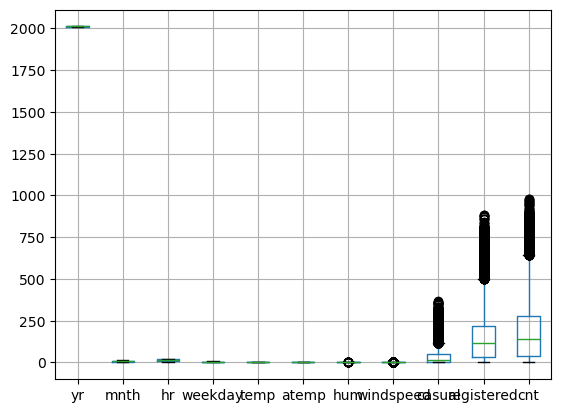

In [19]:
### Detecting Outliers

df.boxplot()
plt.show()

In [20]:
### Capping

def outlier_capping(df,columns):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    iqr=q3-q1
    lower_extreme=q1-1.5*iqr
    upper_extreme=q3+1.5*iqr
    df[columns]=df[columns].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)

for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

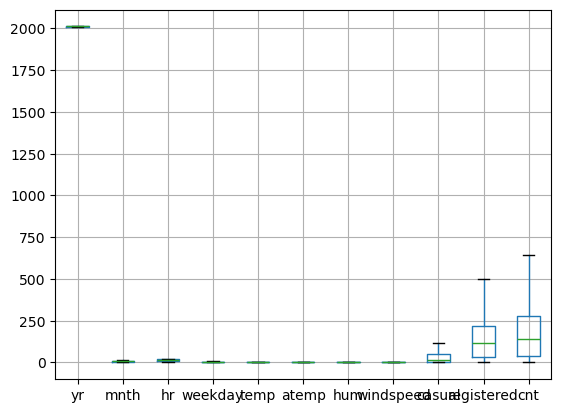

In [21]:
df.boxplot()
plt.show()

### Data Visualization

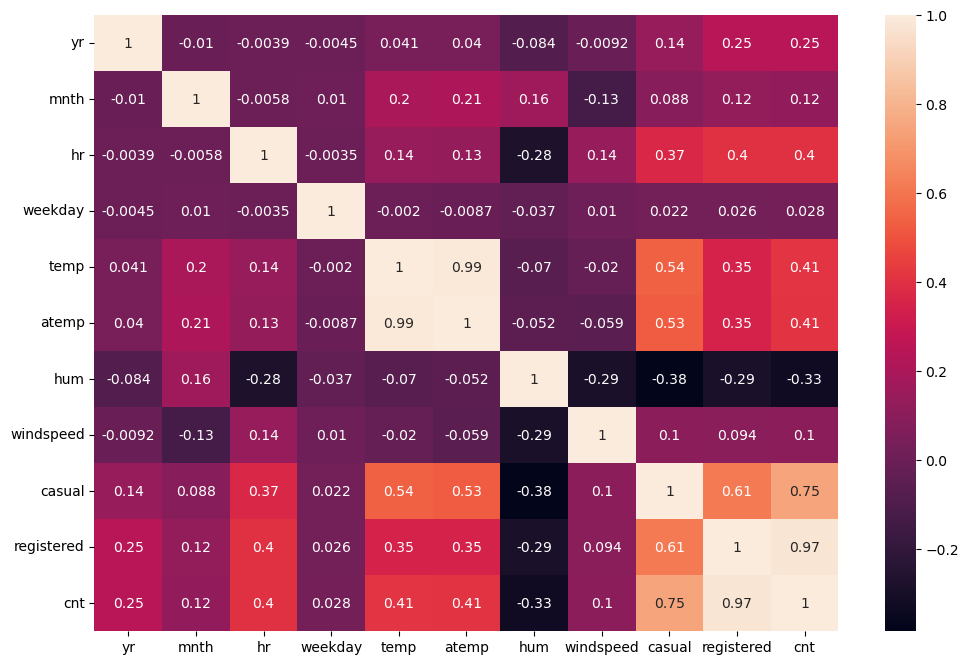

In [22]:
### correlation matrix

plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(data=corr, annot=True)
plt.show()

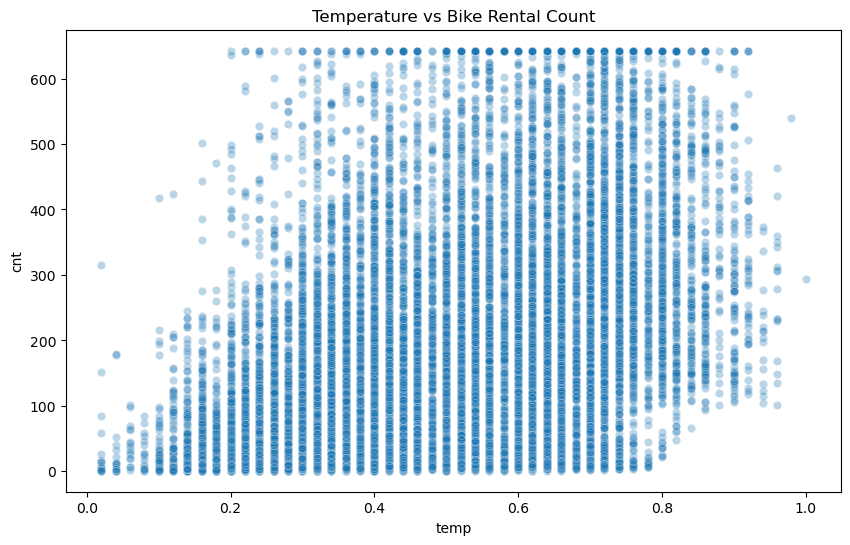

In [23]:
### Scatter Plot: Temp vs Cnt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.3)
plt.title('Temperature vs Bike Rental Count')
plt.show()

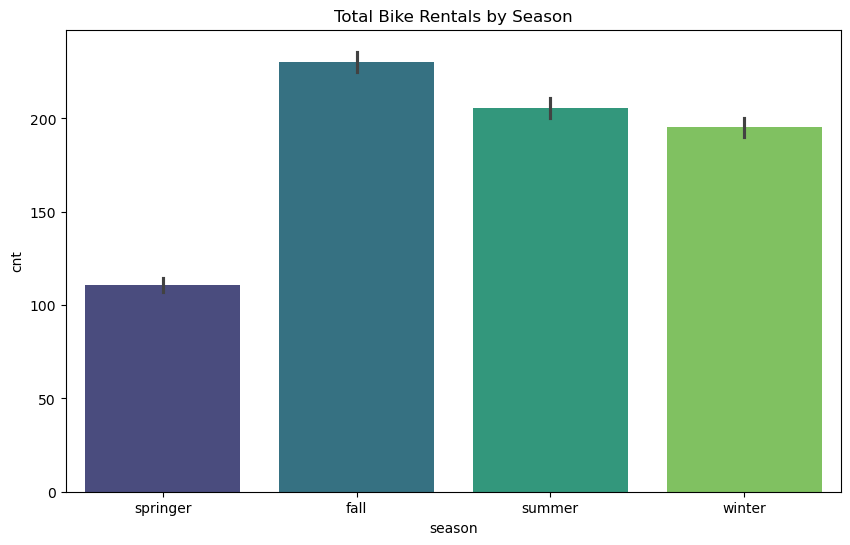

In [24]:
### Bar Plot: Season vs Cnt

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=df, palette='viridis')
plt.title('Total Bike Rentals by Season')
plt.show()

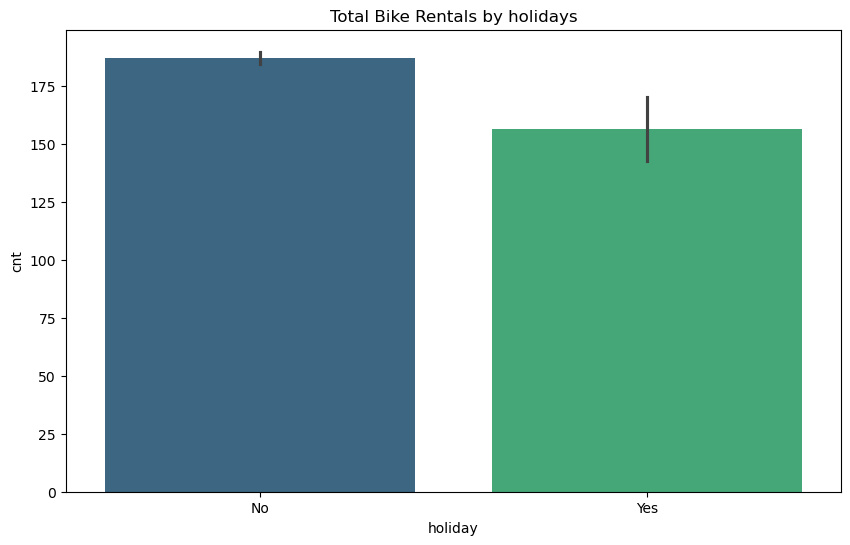

In [25]:
### Bar Plot: holiday vs Cnt

plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=df, palette='viridis')
plt.title('Total Bike Rentals by holidays')
plt.show()

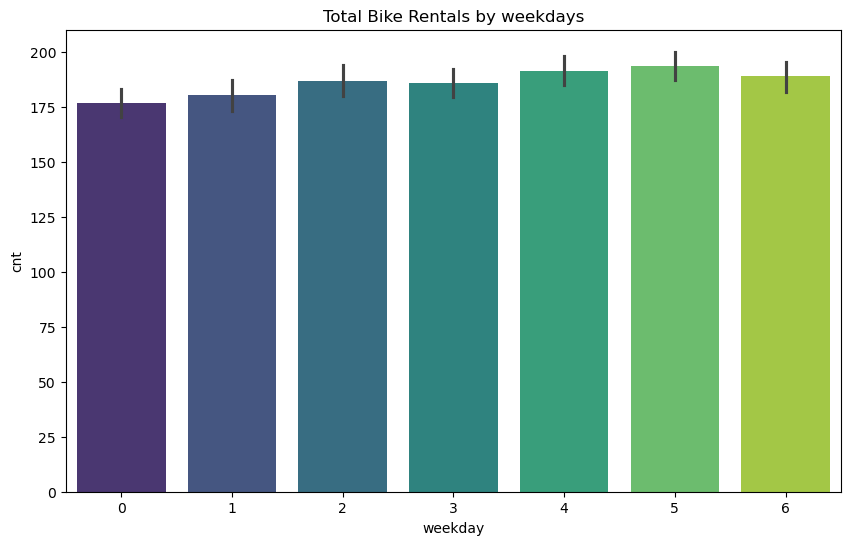

In [26]:
### Bar Plot: holiday vs Cnt

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=df, palette='viridis')
plt.title('Total Bike Rentals by weekdays')
plt.show()

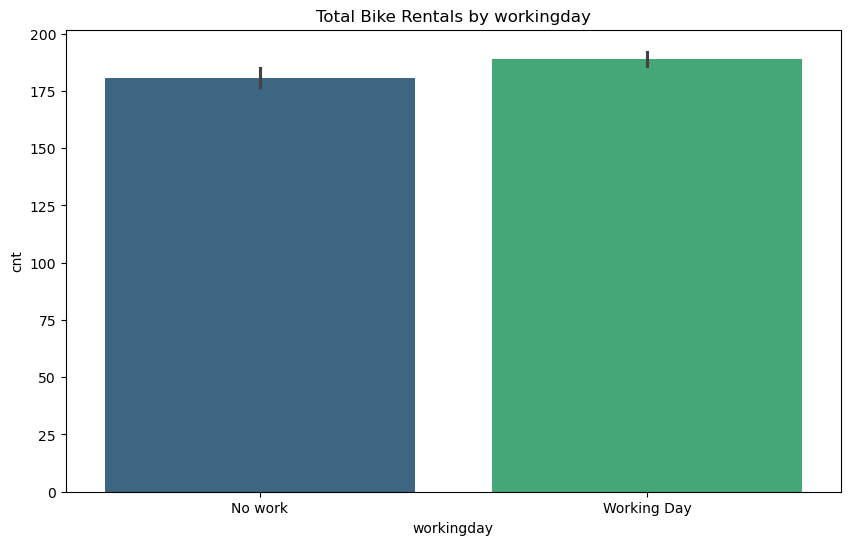

In [27]:
### Bar Plot: workingday vs Cnt

plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=df, palette='viridis')
plt.title('Total Bike Rentals by workingday')
plt.show()

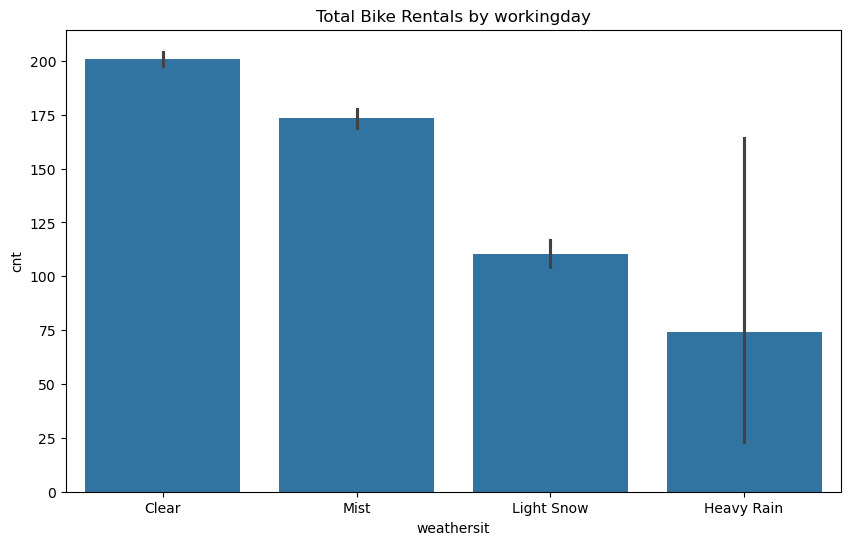

In [28]:
### Bar Plot: weathersit vs Cnt

plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=df)
plt.title('Total Bike Rentals by workingday')
plt.show()

In [29]:
### Feature Engineering

In [30]:
### to check the cnt is equal to casual+registered

df["legit"] = (df["casual"]+df["registered"] == df["cnt"]).astype(int)

In [31]:
### to check the peakhour which is 8am-9am and 5pm to 6pm

df['is_peak_hour'] = ((df['hr'].isin([8 ,9 , 17, 18])) & (df['workingday'] == 'Working Day')).astype(int)

In [32]:
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,legit,is_peak_hour
0,2011-01-01,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,1,0
1,2011-01-01,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,1,0
2,2011-01-01,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,0.63,0.0000,5.0,27.0,32.0,1,0
3,2011-01-01,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,1,0
4,2011-01-01,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0,1,0
17375,2012-12-31,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0,1,0
17376,2012-12-31,springer,2012,12,21,No,1,Working Day,Clear,0.50,0.2576,0.60,0.1642,7.0,83.0,90.0,1,0
17377,2012-12-31,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0,1,0


In [33]:
# Create a copy of the dataframe for modeling
df_model = df.copy()

In [34]:
# Drop the date column as it's represented by yr, mnth, hr, etc.
df_model.drop('dteday', axis=1, inplace=True)

In [35]:
# One-Hot Encoding for categorical variables
df_model = pd.get_dummies(df_model, columns=['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit'], drop_first=True)

In [36]:
# Define Features (X) and Target (y)
# We exclude 'casual' and 'registered' because their sum is the target 'cnt'
X = df_model.drop(['cnt', 'casual', 'registered','legit','is_peak_hour'], axis=1)
y = df_model['cnt']

In [37]:
# Split the data into Training (80%) and Testing (20%) sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [40]:
# Train each model and store results
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    # Calculate Evaluation Metrics 
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

In [41]:
# Display results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                         MAE       RMSE        R2
Decision Tree      32.049626  56.559838  0.887502
Random Forest      23.688895  40.107968  0.943430
Gradient Boosting  43.452417  61.618026  0.866481


In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Use RandomizedSearch for efficiency
rf_tuning = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                               param_distributions=param_grid, 
                               n_iter=10, cv=3, random_state=42)
rf_tuning.fit(X_train_scaled, y_train)

best_model = rf_tuning.best_estimator_
print(f"Best Parameters: {rf_tuning.best_params_}")

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}


In [44]:
# Final evaluation of the best model
final_preds = best_model.predict(X_test_scaled)
print(f"Final Tuned Model R2 Score: {r2_score(y_test, final_preds):.4f}")

# Save the model for deployment
import joblib
joblib.dump(best_model, 'bike_rental_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'features.pkl')
print("Model and Scaler saved successfully.")

Final Tuned Model R2 Score: 0.9434
Model and Scaler saved successfully.


In [1]:
import os
os.getcwd()

'/Users/srirams/Bike_Rental'